<a href="https://colab.research.google.com/github/VoHuynhDuyThanh/AI/blob/main/BT_fuzzylogic_power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

25.528846153846153


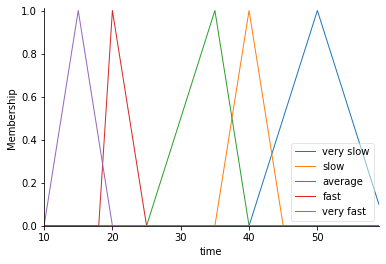

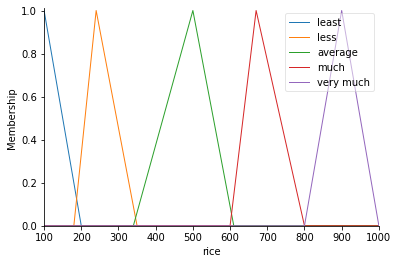

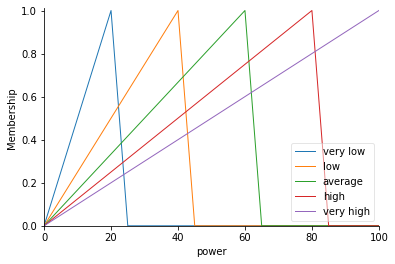

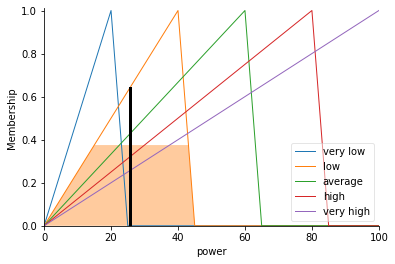

In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

time=ctrl.Antecedent(np.arange(10,60,1),'time')
rice=ctrl.Antecedent(np.arange(100,1001,10),'rice')
power=ctrl.Consequent(np.arange(0,101,5),'power')

time['very slow']=fuzz.trimf(time.universe,[40,50,60])
time['slow']=fuzz.trimf(time.universe,[35,40,45])
time['average']=fuzz.trimf(time.universe,[25,35,40])
time['fast']=fuzz.trimf(time.universe,[18,20,25])
time['very fast']=fuzz.trimf(time.universe,[10,15,20])
time.view()

rice['least']=fuzz.trimf(rice.universe,[100,100,200])
rice['less']=fuzz.trimf(rice.universe,[180,240,350])
rice['average']=fuzz.trimf(rice.universe,[340,500,610])
rice['much']=fuzz.trimf(rice.universe,[600,670,800])
rice['very much']=fuzz.trimf(rice.universe,[800,900,1000])
rice.view()

power['very low'] = fuzz.trimf(power.universe, [0, 20, 20])
power['low'] = fuzz.trimf(power.universe, [0, 40, 40])
power['average'] = fuzz.trimf(power.universe, [0, 60, 60])
power['high'] = fuzz.trimf(power.universe, [0, 80, 80])
power['very high'] = fuzz.trimf(power.universe, [0, 100, 101])
power.view()

rule1 = ctrl.Rule(time['very fast'] & rice['least'], power['very low'])
rule2 = ctrl.Rule(time['very fast'] & rice['less'], power['very low'])
rule3 = ctrl.Rule(time['very fast'] & rice['average'], power['low'])
rule4 = ctrl.Rule(time['very fast'] & rice['much'], power['average'])
rule5 = ctrl.Rule(time['very fast'] & rice['very much'], power['high'])
rule6 = ctrl.Rule(time['fast'] & rice['least'], power['very low'])
rule7 = ctrl.Rule(time['fast'] & rice['less'], power['low'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['average'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['average'])
rule10 = ctrl.Rule(time['fast'] & rice['very much'], power['high'])
rule11 = ctrl.Rule(time['average'] & rice['least'], power['low'])
rule12 = ctrl.Rule(time['average'] & rice['less'], power['average'])
rule13 = ctrl.Rule(time['average'] & rice['average'], power['average'])
rule14 = ctrl.Rule(time['average'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['average'] & rice['very much'], power['very high'])
rule16 = ctrl.Rule(time['slow'] & rice['least'], power['low'])
rule17 = ctrl.Rule(time['slow'] & rice['less'], power['average'])
rule18= ctrl.Rule(time['slow'] & rice['average'], power['high'])
rule19= ctrl.Rule(time['slow'] & rice['much'], power['high'])
rule20= ctrl.Rule(time['slow'] & rice['very much'], power['very high'])
rule21 = ctrl.Rule(time['very slow'] & rice['least'], power['average'])
rule22 = ctrl.Rule(time['very slow'] & rice['less'], power['high'])
rule23 = ctrl.Rule(time['very slow'] & rice['average'], power['high'])
rule24 = ctrl.Rule(time['very slow'] & rice['much'], power['very high'])
rule25 = ctrl.Rule(time['very slow'] & rice['very much'], power['very high'])
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4,rule5,rule6,rule7,rule8,rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['time'] = 15
tipping.input['rice'] = 400
tipping.compute()
print(tipping.output['power'])
power.view(sim = tipping)